# Mini Project 2 - Sales Data Analysis & Projection

## Exploratory Data Analysis

In [131]:
# Import Package

# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

# Date & Time
from datetime import datetime
import datetime as dt
import time

# Prediction Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split

# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

#Avoid some version change warnings
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [132]:
# Load data by import excel file
data = pd.read_csv('sales_data_sample.csv')
pd.options.display.float_format = '{:,.2f}'.format

In [133]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,"2,871.00",2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,"2,765.90",5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,"3,884.34",7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,"3,746.70",8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,"5,205.27",10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [134]:
# Number of rows and columns
data.shape

(2823, 25)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [136]:
# To check missing data 
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [137]:
# Column variables
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [138]:
# Dictionary:

# ORDERNUMBER: the identification number for each order
# QUANTITYORDERED: the quantity ordered
# PRICEEACH: the actual price paid for the transaction in terms of percentage of the MSRP (variable across transactions)
# ORDERLINENUMBER: the number of the order line
# SALES: the amount of sales
# ORDERDATE: the order date
# STATUS: the shipping status (Shipped, Resolved, Cancelled, On Hold, Disputed, and In Progress)
# QTR_ID: the quarter of the order date
# MONTH_ID: the month of the order date
# YEAR_ID: the year of the order date
# PRODUCTLINE: the category of products
# MSRP: the manufacture’s suggested retail price (constant across transactions)
# PRODUCTCODE: the identification code for each product
# CUSTOMERNAME: the names of customers
# PHONE: the phone numbers of customers
# ADDRESSLINE1: addressline 1 for customers
# ADDRESSLINE2: address line 2 for customers
# CITY: city names for customers
# STATE: state names for customers (only for customers located in the US)
# POSTALCODE: postal codes for customers
# COUNTRY: countries for customers
# TERRITORY: the regional names of each country (NA, EMEA, Japan, and APAC)
# CONTACTLASTNAME and CONTACTFIRSTNAME: the last and first names of customers
# DEALSIZE: the deal sizes of orders

In [139]:
# Check variable unique
data['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [140]:
# Check variable unique
data['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [141]:
# Check variable unique
data['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [142]:
# Check variable unique
data['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [143]:
# # Drop uncessary column
# drop_features = ['ADDRESSLINE2','STATE','POSTALCODE','TERRITORY']
# data = data.drop(drop_features, axis = 1)

In [144]:
# Alternativee 
# To fill up empty value with 0
data.fillna(0,inplace=True)

In [145]:
#Check data again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      2823 non-null   object 


In [146]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data = pd.DataFrame(data)

In [147]:
data.sort_values(by = ['ORDERDATE'], inplace = True)
# data.set_index('ORDERDATE', inplace = True)

In [148]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
578,10100,30,100.00,3,"5,151.00",2003-01-06,Shipped,1,1,2003,...,2304 Long Airport Avenue,0,Nashua,NH,62005,USA,0,Young,Valarie,Medium
680,10100,50,67.80,2,"3,390.00",2003-01-06,Shipped,1,1,2003,...,2304 Long Airport Avenue,0,Nashua,NH,62005,USA,0,Young,Valarie,Medium
1267,10100,22,86.51,4,"1,903.22",2003-01-06,Shipped,1,1,2003,...,2304 Long Airport Avenue,0,Nashua,NH,62005,USA,0,Young,Valarie,Small
2024,10100,49,34.47,1,"1,689.03",2003-01-06,Shipped,1,1,2003,...,2304 Long Airport Avenue,0,Nashua,NH,62005,USA,0,Young,Valarie,Small
1539,10101,45,31.20,3,"1,404.00",2003-01-09,Shipped,1,1,2003,...,Lyonerstr. 34,0,Frankfurt,0,60528,Germany,EMEA,Keitel,Roland,Small


In [149]:
# Correlation
data_corr = data.corr()
data_corr

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERNUMBER,1.00,0.07,-0.00,-0.06,0.04,-0.05,-0.04,0.90,-0.01
QUANTITYORDERED,0.07,1.00,0.01,-0.02,0.55,-0.04,-0.04,0.07,0.02
PRICEEACH,-0.00,0.01,1.00,-0.02,0.66,0.01,0.01,-0.01,0.67
ORDERLINENUMBER,-0.06,-0.02,-0.02,1.00,-0.06,0.04,0.03,-0.06,-0.02
SALES,0.04,0.55,0.66,-0.06,1.00,-0.01,-0.01,0.04,0.64
QTR_ID,-0.05,-0.04,0.01,0.04,-0.01,1.00,0.98,-0.43,0.01
MONTH_ID,-0.04,-0.04,0.01,0.03,-0.01,0.98,1.00,-0.43,0.01
YEAR_ID,0.90,0.07,-0.01,-0.06,0.04,-0.43,-0.43,1.00,-0.01
MSRP,-0.01,0.02,0.67,-0.02,0.64,0.01,0.01,-0.01,1.00


In [150]:
# Check correlation
data.corr()['SALES'].sort_values(ascending=False)

SALES              1.00
PRICEEACH          0.66
MSRP               0.64
QUANTITYORDERED    0.55
ORDERNUMBER        0.04
YEAR_ID            0.04
QTR_ID            -0.01
MONTH_ID          -0.01
ORDERLINENUMBER   -0.06
Name: SALES, dtype: float64

In [151]:
# Check correlation
data.corr()['QUANTITYORDERED'].sort_values(ascending=False)

QUANTITYORDERED    1.00
SALES              0.55
YEAR_ID            0.07
ORDERNUMBER        0.07
MSRP               0.02
PRICEEACH          0.01
ORDERLINENUMBER   -0.02
QTR_ID            -0.04
MONTH_ID          -0.04
Name: QUANTITYORDERED, dtype: float64

In [152]:
# Check correlation
data.corr()['PRICEEACH'].sort_values(ascending=False) 

PRICEEACH          1.00
MSRP               0.67
SALES              0.66
QTR_ID             0.01
QUANTITYORDERED    0.01
MONTH_ID           0.01
ORDERNUMBER       -0.00
YEAR_ID           -0.01
ORDERLINENUMBER   -0.02
Name: PRICEEACH, dtype: float64

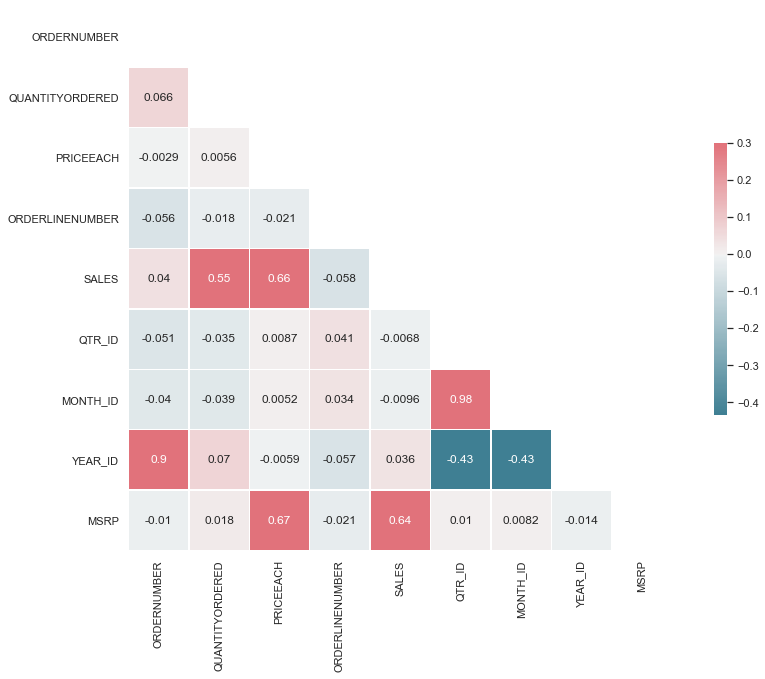

In [153]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

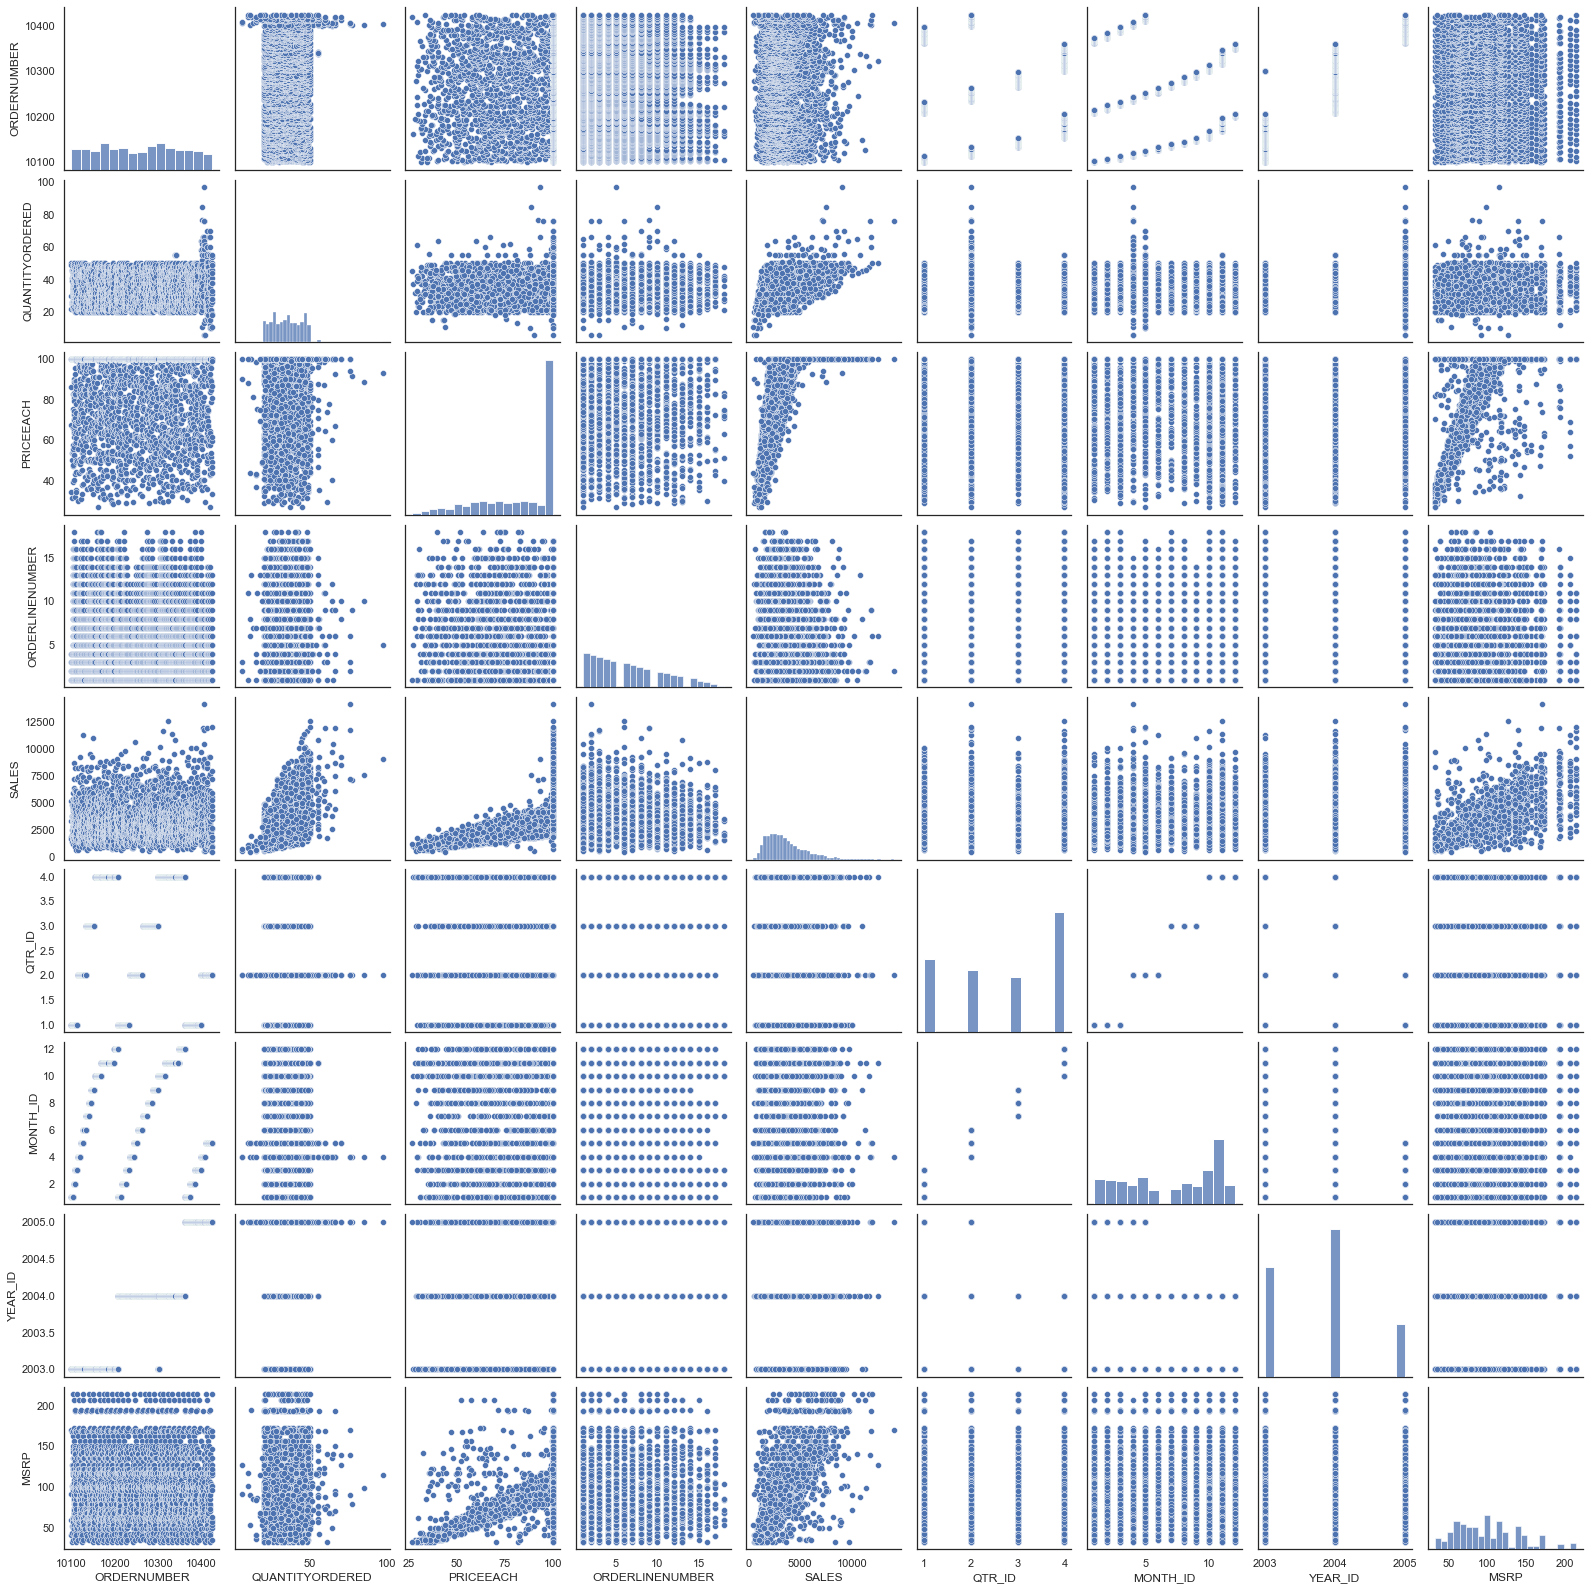

In [154]:
sns.pairplot(data);

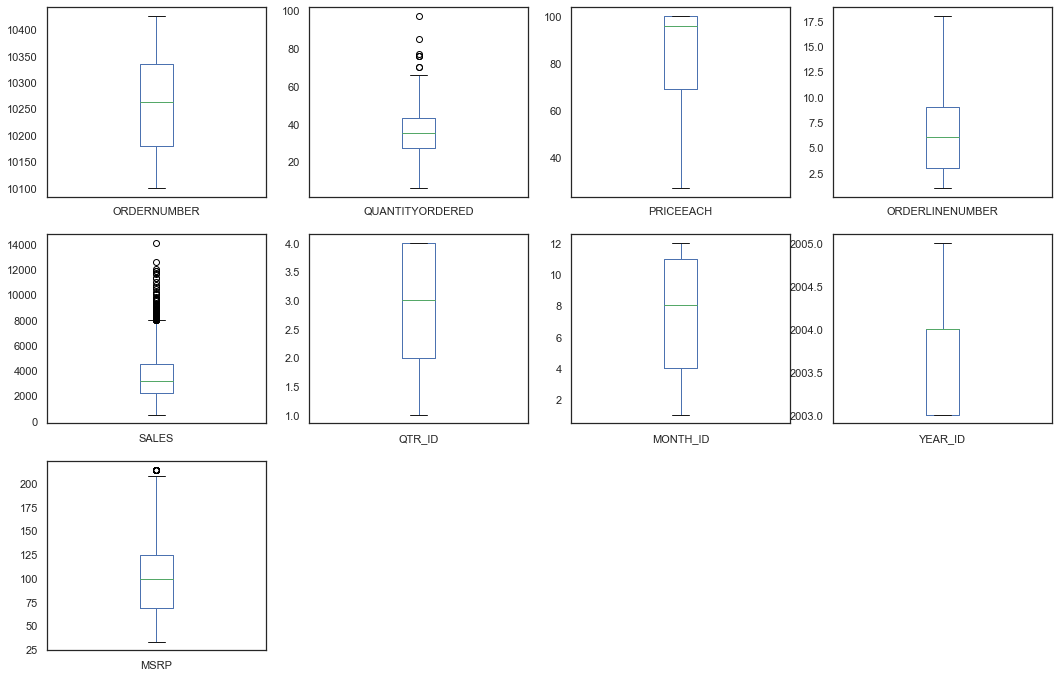

In [155]:
plt.rcParams['figure.figsize'] = [18, 16]
data.plot(kind="box",subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

In [156]:
def draw_scatter_plot(X, Y):
    fig = plt.figure(figsize=(12,6))
    ax = plt.gca()
    plt.title('PRICE EACH against SALES', fontsize=25)
    plt.xlabel("PRICE EACH", fontsize=20)
    plt.ylabel("SALES", fontsize=20)
    ax.scatter(X, Y, c='y', marker='*', alpha=0.8, edgecolors="green", s=50)
    plt.show();

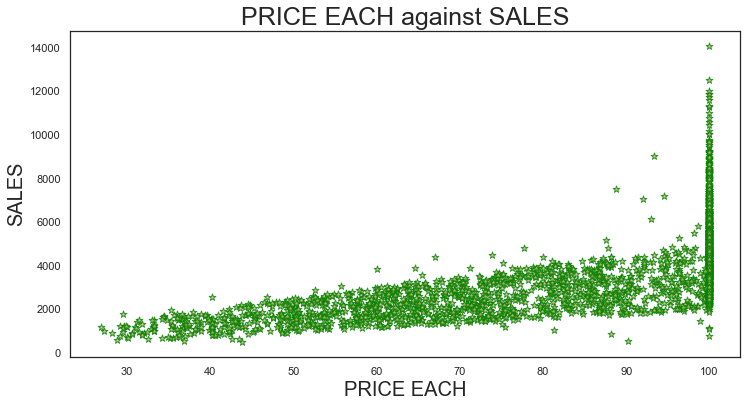

In [157]:
draw_scatter_plot(data['PRICEEACH'], data['SALES'])


In [158]:
def draw_scatter_plot(X, Y):
    fig = plt.figure(figsize=(12,6))
    ax = plt.gca()
    plt.title('MSRP against SALES', fontsize=25)
    plt.xlabel("Manufacture Suggest Retail Price (MSRP)", fontsize=20)
    plt.ylabel("SALES", fontsize=20)
    ax.scatter(X, Y, c='y', marker='*', alpha=0.8, edgecolors="green", s=50)
    plt.show();

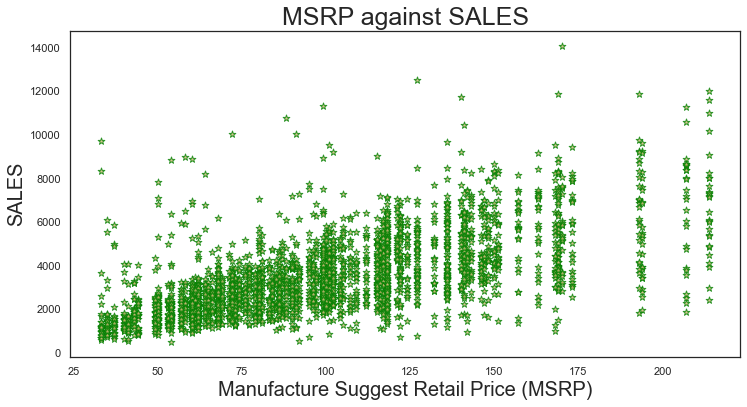

In [159]:
draw_scatter_plot(data['MSRP'], data['SALES'])

In [160]:
def draw_scatter_plot(X, Y):
    fig = plt.figure(figsize=(12,6))
    ax = plt.gca()
    plt.title('QUANTITY ORDERED against SALES', fontsize=25)
    plt.xlabel("QUANTITY ORDERED", fontsize=20)
    plt.ylabel("SALES", fontsize=20)
    ax.scatter(X, Y, c='y', marker='*', alpha=0.8, edgecolors="green", s=50)
    plt.show();

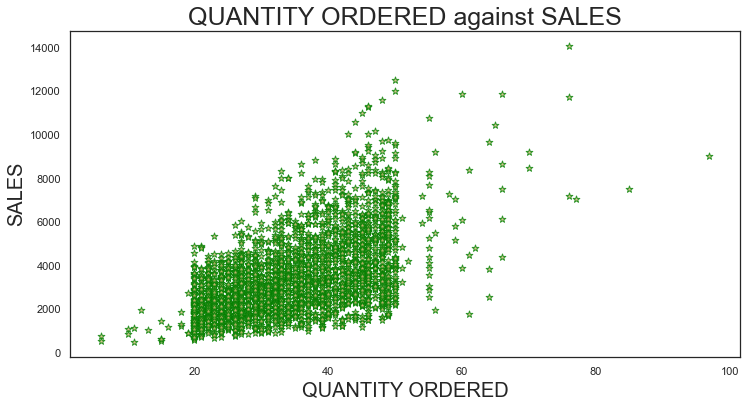

In [161]:
draw_scatter_plot(data['QUANTITYORDERED'], data['SALES'])

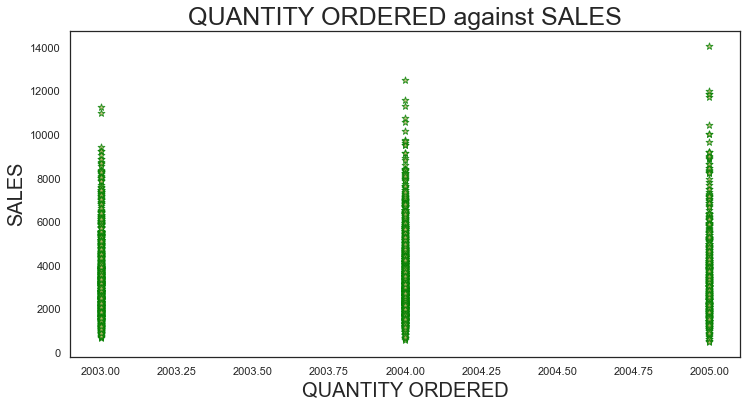

In [162]:
draw_scatter_plot(data['YEAR_ID'], data['SALES'])

In [163]:
anm_sales = data.groupby(['YEAR_ID']).sum().sort_values('SALES', ascending = False).head(10)
anm_sales = anm_sales[['SALES']].round(2)
anm_sales.reset_index(inplace = True)

In [164]:
anm_sales

,YEAR_ID,SALES
0,2004,"4,724,162.60"
1,2003,"3,516,979.54"
2,2005,"1,791,486.71"


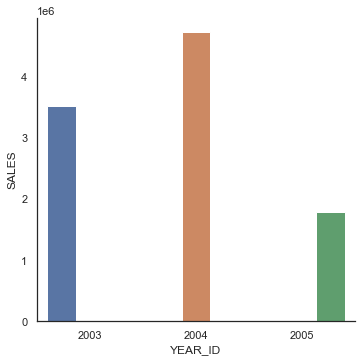

In [165]:
sns.factorplot(y='SALES', x='YEAR_ID',data=anm_sales,kind="bar" ,hue='YEAR_ID', size=5, aspect=1)

In [166]:
sales_yty =data.groupby(['YEAR_ID','QTR_ID']).agg({'SALES': lambda x: x.sum() })
# print(sales_yty .info())

In [167]:
sales_yty.head()
sales_yty.reset_index(inplace=True)
sales_yty.head(13)

,YEAR_ID,QTR_ID,SALES
0,2003,1,"445,094.69"
1,2003,2,"562,365.22"
2,2003,3,"649,514.54"
3,2003,4,"1,860,005.09"
4,2004,1,"833,730.68"
5,2004,2,"766,260.73"
6,2004,3,"1,109,396.27"
7,2004,4,"2,014,774.92"
8,2005,1,"1,071,992.36"
9,2005,2,"719,494.35"


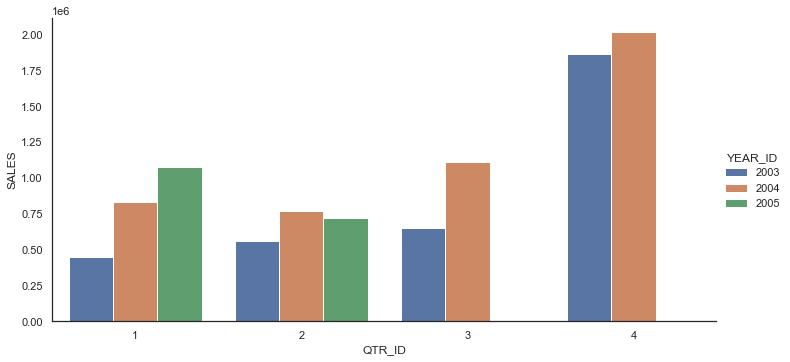

In [168]:
sns.factorplot(y='SALES', x='QTR_ID',data=sales_yty,kind="bar" ,hue='YEAR_ID', size=5, aspect=2)

In [169]:
# top_product_revenues = data.groupby(['PRODUCTLINE']).sum().sort_values('SALES', ascending = False)
# top_product_revenues = top_product_revenues[['SALES']] 
# top_product_revenues
# ax = top_product_revenues.plot.bar(figsize=(15,6),color= "blue",rot=0)

In [170]:
top_product = data.groupby(['PRODUCTLINE']).sum().sort_values('SALES', ascending = False)
top_product = top_product[['SALES']]
top_product.reset_index(inplace = True)
total_revenue_product = top_product['SALES'].sum()
total_revenue_product = str(int(total_revenue_product))
total_revenue_product = '$' + total_revenue_product

In [171]:
top_product

,PRODUCTLINE,SALES
0,Classic Cars,"3,919,615.66"
1,Vintage Cars,"1,903,150.84"
2,Motorcycles,"1,166,388.34"
3,Trucks and Buses,"1,127,789.84"
4,Planes,"975,003.57"
5,Ships,"714,437.13"
6,Trains,"226,243.47"


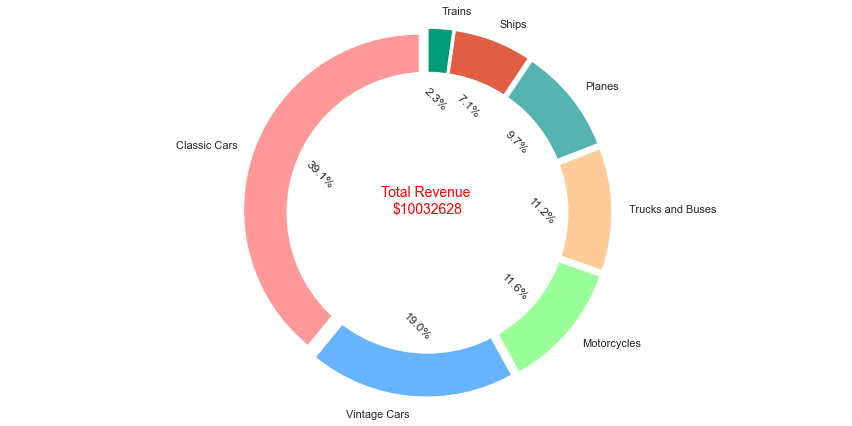

In [172]:
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 6
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v = val)
    return my_format
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77']
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
pie1 = ax1.pie(top_product['SALES'], colors = colors, labels = top_product['PRODUCTLINE'], autopct='%1.1f%%', startangle = 90, explode = explode)
fraction_text_list = pie1[2]
for text in fraction_text_list:
    text.set_rotation(315)
center_circle = plt.Circle((0,0), 0.80, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
ax1.axis('equal')
label = ax1.annotate('Total Revenue \n' + str(total_revenue_product), color = 'red', xy = (0,0), fontsize = 14, ha  ='center')
plt.tight_layout()
plt.show()

# # # plot estimatied frequency of some observations using pie chart
# plt.figure(figsize=(10,10))
# labels = pvt_avg_rating['property_type']
# frequency = pvt_avg_rating['num_of_listing']
# myexplode = [0.1, 0, 0, 0, 0]
# plt.pie(frequency, labels=labels, explode=myexplode, autopct='%1.1f%%',textprops={'fontsize': 15})
# plt.axis('equal')
# plt.show()


In [173]:
top_customer = data.groupby(['CUSTOMERNAME']).sum().sort_values('SALES', ascending = False).head(10)
top_customer = top_customer[['SALES']].round(2)
top_customer.reset_index(inplace = True)

In [174]:
top_customer

,CUSTOMERNAME,SALES
0,Euro Shopping Channel,"912,294.11"
1,Mini Gifts Distributors Ltd.,"654,858.06"
2,"Australian Collectors, Co.","200,995.41"
3,Muscle Machine Inc,"197,736.94"
4,La Rochelle Gifts,"180,124.90"
5,"Dragon Souveniers, Ltd.","172,989.68"
6,Land of Toys Inc.,"164,069.44"
7,The Sharp Gifts Warehouse,"160,010.27"
8,"AV Stores, Co.","157,807.81"
9,"Anna's Decorations, Ltd","153,996.13"


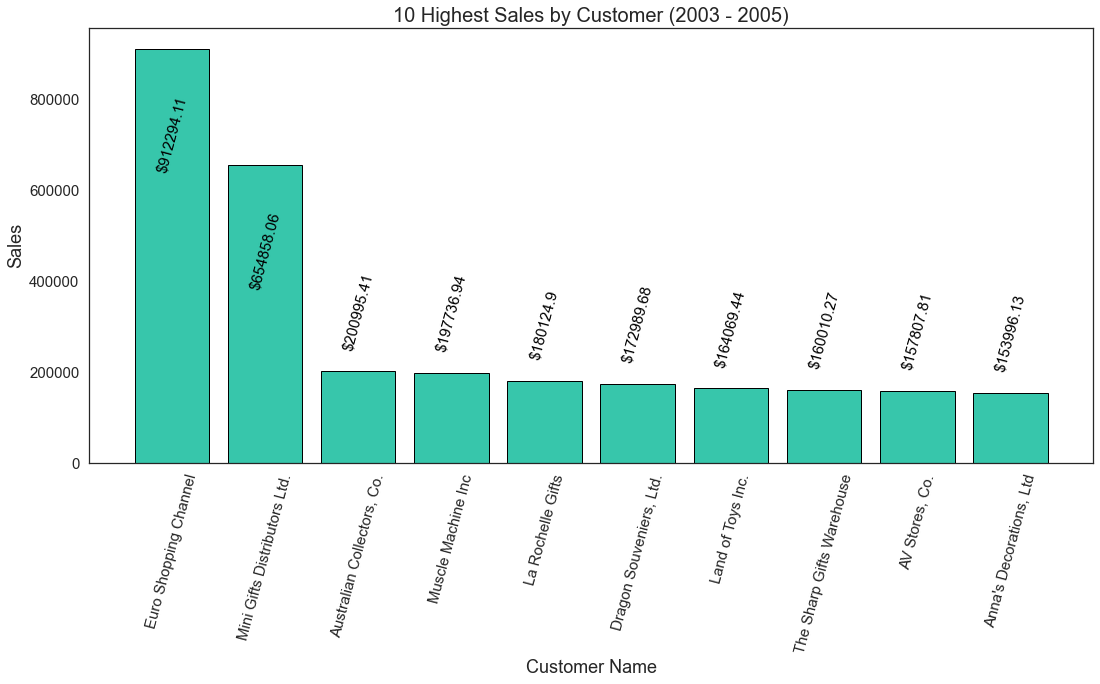

In [175]:
plt.figure(figsize = (18,8))
plt.title('10 Highest Sales by Customer (2003 - 2005)', fontsize = 20)
plt.bar(top_customer['CUSTOMERNAME'], top_customer['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1)
plt.xlabel('Customer Name', fontsize = 18)
plt.ylabel('Sales', fontsize = 18)
plt.xticks(fontsize = 15, rotation = 75)
plt.yticks(fontsize = 15)
for k, v in top_customer['SALES'].items():
    if v > 600000:
        plt.text(k, v-270000, '$' + str(v), fontsize = 15, rotation = 75, color = 'black', ha = 'center')
    else:
        plt.text(k, v+ 50000, '$' + str(v), fontsize = 15, rotation = 75, color = 'black', ha = 'center')

In [176]:
top_country = data.groupby(['COUNTRY']).sum().sort_values('SALES', ascending = False).head(10)
top_country = top_country[['SALES']].round(2)
top_country.reset_index(inplace = True)

In [177]:
top_country 

,COUNTRY,SALES
0,USA,"3,627,982.83"
1,Spain,"1,215,686.92"
2,France,"1,110,916.52"
3,Australia,"630,623.10"
4,UK,"478,880.46"
5,Italy,"374,674.31"
6,Finland,"329,581.91"
7,Norway,"307,463.70"
8,Singapore,"288,488.41"
9,Denmark,"245,637.15"


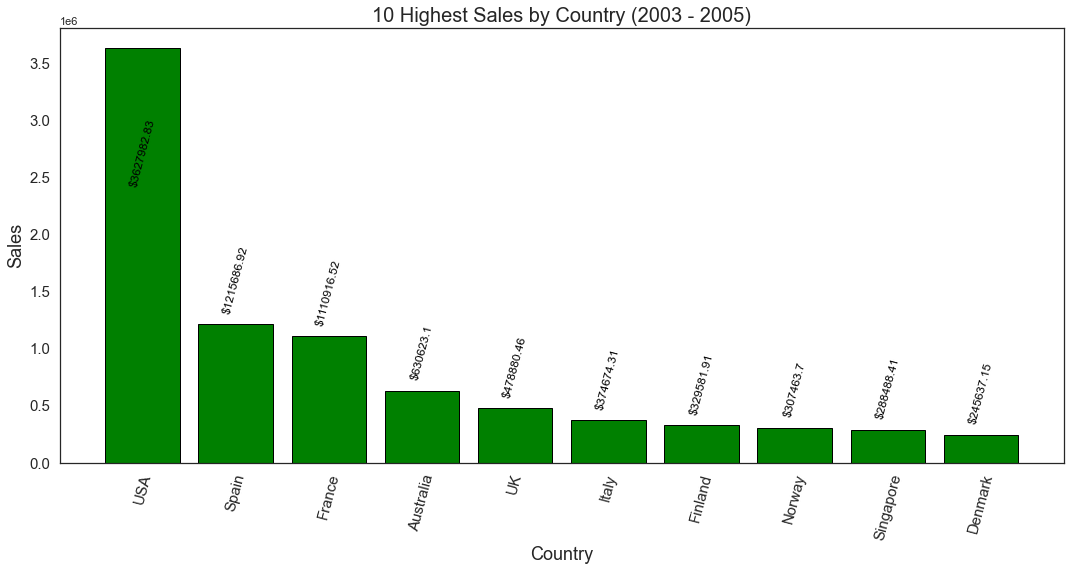

In [178]:
plt.figure(figsize = (18,8))
plt.title('10 Highest Sales by Country (2003 - 2005)', fontsize = 20)
plt.bar(top_country['COUNTRY'], top_country['SALES'], color = 'Green', edgecolor = 'black', linewidth = 1)
plt.xlabel('Country', fontsize = 18)
plt.ylabel('Sales', fontsize = 18)
plt.xticks(fontsize = 15, rotation = 75)
plt.yticks(fontsize = 15)
for k, v in top_country['SALES'].items():
    if v > 3000000:
        plt.text(k, v-1200000, '$' + str(v), fontsize = 12, rotation = 75, color = 'black', ha = 'center')
    else:
        plt.text(k, v+100000, '$' + str(v), fontsize = 12, rotation = 75, color = 'black', ha = 'center')

In [179]:
top_city = data.groupby(['CITY']).sum().sort_values('SALES', ascending = False).head(10)
top_city = top_city[['SALES']].round(2)
top_city.reset_index(inplace = True)

In [180]:
top_city

,CITY,SALES
0,Madrid,"1,082,551.44"
1,San Rafael,"654,858.06"
2,NYC,"560,787.77"
3,Singapore,"288,488.41"
4,Paris,"268,944.68"
5,San Francisco,"224,358.68"
6,New Bedford,"207,874.86"
7,Nantes,"204,304.86"
8,Melbourne,"200,995.41"
9,Brickhaven,"165,255.20"


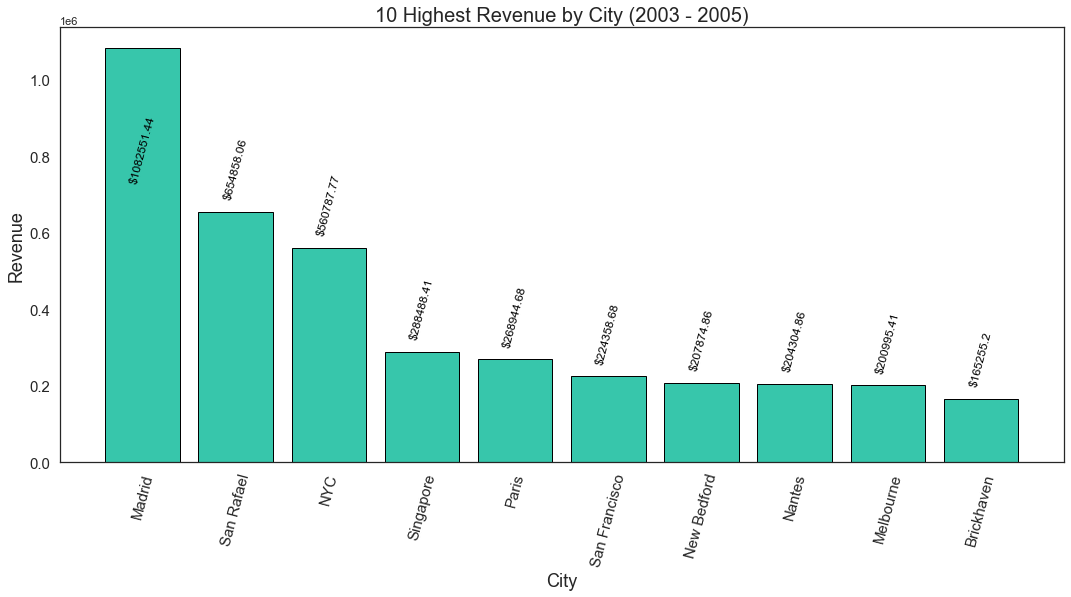

In [181]:
plt.figure(figsize = (18,8))
plt.title('10 Highest Revenue by City (2003 - 2005)', fontsize = 20)
plt.bar(top_city['CITY'], top_city['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1 )
plt.xlabel('City', fontsize = 18)
plt.ylabel('Revenue', fontsize = 18)
plt.xticks(fontsize = 15, rotation = 75)
plt.yticks(fontsize = 15)
for k, v, in top_city['SALES'].items():
    if v > 800000:
        plt.text(k, v-350000, '$' + str(v), fontsize = 12, rotation = 75, color = 'black', ha = 'center')
    else:
        plt.text(k, v+35000, '$' + str(v), fontsize = 12, rotation = 75, color = 'black', ha = 'center')

In [182]:
data['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

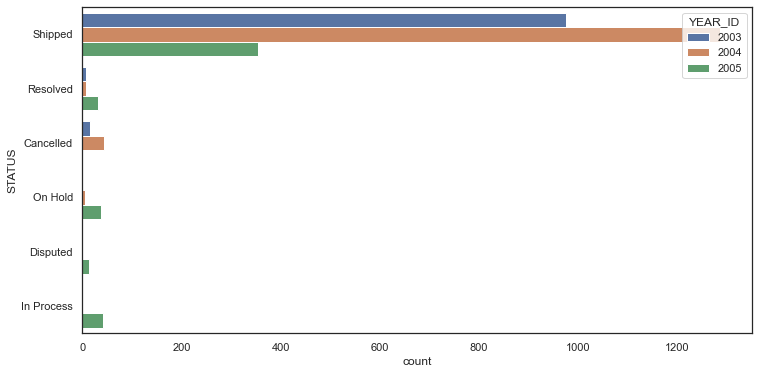

In [183]:
sns.countplot(y='STATUS',data=data,hue='YEAR_ID');

In [184]:
data['DEALSIZE'].value_counts()

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

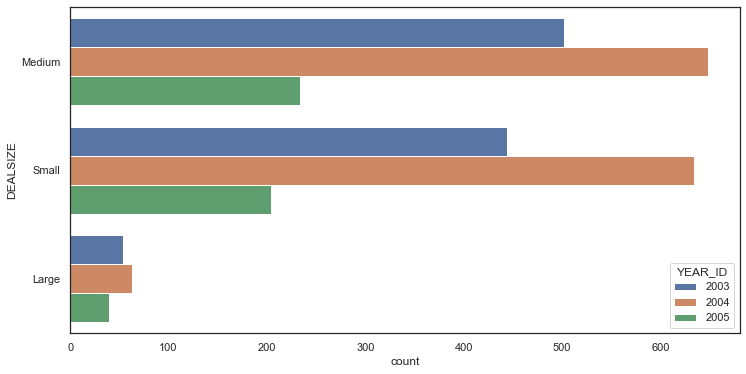

In [185]:
sns.countplot(y='DEALSIZE',data=data,hue='YEAR_ID');
sns.set(rc={'figure.figsize':(12,30)})

In [186]:
anm_qty_order = data.groupby(['YEAR_ID']).sum().sort_values('QUANTITYORDERED', ascending = False).head(10)
anm_qty_order = anm_qty_order[['QUANTITYORDERED']].round(2)
anm_qty_order.reset_index(inplace = True)

In [187]:
anm_qty_order

,YEAR_ID,QUANTITYORDERED
0,2004,46824
1,2003,34612
2,2005,17631


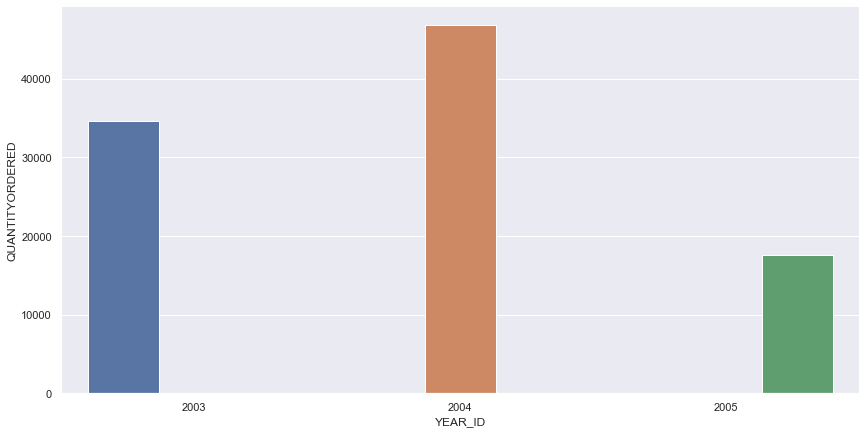

In [188]:
sns.factorplot(y='QUANTITYORDERED', x='YEAR_ID',data=anm_qty_order,kind="bar" ,hue='YEAR_ID', size=6, aspect=2)


# 

## Linear Regression Model

In [189]:
# Check correlation to Sales
data.corr()['SALES'].sort_values(ascending=False)

SALES              1.00
PRICEEACH          0.66
MSRP               0.64
QUANTITYORDERED    0.55
ORDERNUMBER        0.04
YEAR_ID            0.04
QTR_ID            -0.01
MONTH_ID          -0.01
ORDERLINENUMBER   -0.06
Name: SALES, dtype: float64

In [190]:
# Target Variable
y = data['SALES']

In [191]:
# Choose the feature which are strogly correlated with "SALES"
predictor_columns = ['PRICEEACH', 'MSRP', 'QUANTITYORDERED']

In [192]:
X = data[predictor_columns]
X.head()

,PRICEEACH,MSRP,QUANTITYORDERED
578,100.00,170,30
680,67.80,60,50
1267,86.51,92,22
2024,34.47,41,49
1539,31.20,33,45


In [193]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [194]:
lr = LinearRegression()

In [195]:
# Fit and score model on training data
lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
print('Train score:', train_score)
print('Train intercept:', lr.intercept_)
print('Train coef:', lr.coef_)

Train score: 0.7888237319564683
Train intercept: -4858.031679412042
Train coef: [ 40.19475645  14.5150129  102.00713113]


In [196]:
# Find coefficients of Train Data
lr_coef_df_train = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coef_df_train

,feature,coefficient
0,PRICEEACH,40.19
1,MSRP,14.52
2,QUANTITYORDERED,102.01


In [197]:
# Fit and score model on test data
lr.fit(X_test, y_test)
test_score = lr.score(X_test, y_test)
print('Test Score:', test_score)
print('Test intercept:', lr.intercept_)
print('Test coef:', lr.coef_)

Test Score: 0.8247528779614339
Test intercept: -4881.145150510329
Test coef: [ 33.89792828  19.6712589  103.72847066]


In [198]:
# Find coefficients of Test Data
lr_coef_df_Test = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coef_df_Test

,feature,coefficient
0,PRICEEACH,33.90
1,MSRP,19.67
2,QUANTITYORDERED,103.73


In [199]:
# beta1 = lr.coef_[0]
# Ypred = (cfl[0] * x[) + (cfl[1] * x[1]) + (cfl[2] * x[2])  + b0

In [200]:
# Function to Plot Coefficients
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    plt.figure(figsize = (14, 8))
    sns.barplot(x="variable", y="coef", data=model_coefs)

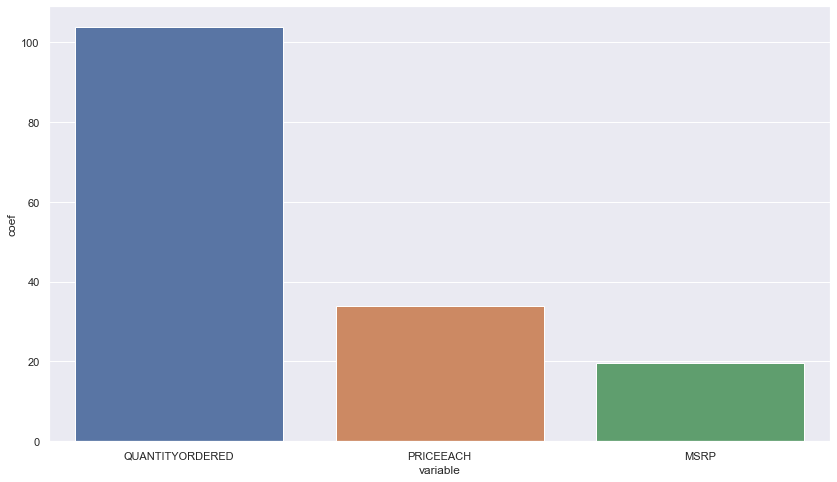

In [201]:
view_coeff(X, lr)

### Cross Validation

In [202]:
# Cross Validation 
k_fold = KFold(10, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []
k_fold.split(X)

<generator object _BaseKFold.split at 0x00000281D262D740>

In [203]:
type(k_fold.split(X))

generator

In [204]:
k_fold.get_n_splits(X)

10

In [205]:
for train_index, test_index in k_fold.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [   0    1    2 ... 2817 2818 2821] TEST: [  28   35   39   45   63   67   97  103  111  130  143  156  165  183
  190  202  236  244  267  269  278  286  294  297  308  318  320  325
  347  374  380  382  389  396  402  419  427  449  454  455  457  459
  491  492  506  519  523  533  534  539  575  579  586  588  600  604
  615  626  634  668  684  687  688  699  746  748  759  772  811  825
  831  833  835  842  847  870  873  874  877  895  909  935  951  966
  977 1002 1026 1040 1064 1078 1082 1098 1100 1106 1114 1115 1119 1122
 1123 1136 1141 1158 1172 1176 1183 1188 1197 1202 1206 1212 1214 1218
 1228 1231 1276 1281 1282 1286 1320 1335 1336 1347 1358 1360 1369 1372
 1393 1394 1428 1443 1450 1451 1459 1469 1480 1481 1486 1494 1507 1525
 1536 1537 1540 1569 1574 1576 1587 1591 1597 1604 1621 1622 1624 1635
 1666 1674 1678 1685 1697 1708 1733 1745 1770 1777 1784 1788 1795 1816
 1823 1847 1875 1876 1889 1891 1902 1930 1933 1952 1959 1969 1981 1998
 2004 2007 2021 2028 2036 20

In [206]:
# Set up 5-fold cross validation  
k_fold = KFold(10, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    lr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(10)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.80,0.77,832.98,826.86
2,0.79,0.84,849.19,657.59
3,0.80,0.74,815.55,966.59
4,0.79,0.81,838.37,771.95
5,0.79,0.82,840.42,751.43
6,0.79,0.85,848.89,660.65
7,0.80,0.77,822.12,916.03
8,0.80,0.78,818.39,946.76
9,0.80,0.79,816.95,957.72
10,0.80,0.79,834.13,811.91


In [258]:
# Model with lowest test MSE is best model
bestModel = pd.DataFrame(metrics_df.iloc[5]).T
bestModel

,Training R2,Test R2,Training RMSE,Test RMSE
6,0.79,0.85,848.89,660.65


In [259]:
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,10.00,10.00,10.00,10.00
mean,0.80,0.80,831.70,826.75
std,0.00,0.03,12.81,117.47
min,0.79,0.74,815.55,657.59
25%,0.79,0.77,819.32,756.56
50%,0.80,0.79,833.55,819.38
75%,0.80,0.82,839.91,939.08
max,0.80,0.85,849.19,966.59


In [260]:
# Compare RMSE Test & RMSE Train to check if overfitting
# Assumption: < 10%

overfitting = (((bestModel['Test RMSE'] - bestModel['Training RMSE'])/ bestModel['Training RMSE'])*100 ) 
if overfitting.all()  > 10:
    print("Overfitting :", overfitting)
else:
    print("No overfitting")

No overfitting


### Error Reduction

In [210]:
cfl = (list(lr.coef_))
b0 = lr.intercept_
b11 = cfl[0]
b12 = cfl[1]
b13 = cfl[2]

print('b0 =', b0)
print('b11 =', b11)
print('b12 =', b12)
print('b13 =', b13)

b0 = -4890.541671537727
b11 = 38.988694348629565
b12 = 15.670531084890062
b13 = 102.81921392939567


In [211]:
#  MSE Y Bar
def calculate_total_sum_of_square(y):
    ybar = np.mean(y)
    SStot = np.square(y - ybar)
    SStot = np.sum(SStot)
    return SStot

In [212]:
MSE_ybar = calculate_total_sum_of_square(y)
MSE_ybar 

9573542065.17157

In [213]:
# ANSWER
def calculate_yhat(x, b0, b11, b12, b13):
    return b0 + (b11 * x) + (b12 * x) + (b13 * x)

In [214]:
yhat = calculate_yhat(X, b0, b11,b12,b13)
yhat

,PRICEEACH,MSRP,QUANTITYORDERED
578,"10,857.30","21,880.79",-166.19
680,"5,786.50","4,558.16","2,983.38"
1267,"8,732.92","9,597.47","-1,426.02"
2024,537.74,"1,566.07","2,825.90"
1539,22.79,306.25,"2,195.99"
...,...,...,...
2405,"10,857.30","13,219.48","-2,055.93"
393,"10,857.30","13,691.91",306.25
160,"10,857.30","18,258.79","1,093.64"
2302,"4,780.21","5,188.08","2,038.51"


In [215]:
#  MSE Y Hat
def calculate_residual_sum_of_square(y, yhat):
    SSres = np.square(y - yhat)
    SSres = np.sum(SSres)
    return SSres

In [216]:
#  Empty Data
MSE_yhat = calculate_residual_sum_of_square(y, yhat)
MSE_yhat

0                 0.00
1                 0.00
2                 0.00
3                 0.00
4                 0.00
                  ... 
2821              0.00
2822              0.00
MSRP              0.00
PRICEEACH         0.00
QUANTITYORDERED   0.00
Length: 2826, dtype: float64

In [217]:
# Error Reduction
# ER = (MSE_ybar  - MSE_yhat )/ MSE_ybar

In [218]:
# Y_pred = lr.predict(np.array(X_test))
# len(Y_pred)

In [219]:
# ybar = data['SALES'].mean()
# ybar

In [220]:
# y_test
# len(y_test)

In [221]:
# MSE_yhat = mean_squared_error(np.array(y_train), Y_pred)

In [222]:
# # Using average (Dont delete)
# avg_error['Test RMSE'] - bestModel['Test RMSE']

In [223]:
# # Using average (Dont delete)
# 100 * (float(avg_error['Test RMSE']) - float(bestModel['Test RMSE'])) / float(avg_error['Test RMSE']) 

In [224]:
# # Using average (Dont delete)
# avg_error = pd.DataFrame(metrics_df.mean()).T
# avg_error 

### Forward Feature Selection

In [225]:
## Flag intermediate output
show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [226]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature PRICEEACH with R^2 = 0.436 and adjusted R^2 = 0.434
Added feature QUANTITYORDERED with R^2 = 0.733 and adjusted R^2 = 0.731
Added feature MSRP with R^2 = 0.797 and adjusted R^2 = 0.795
**************************************************

Resulting features:
PRICEEACH, QUANTITYORDERED, MSRP


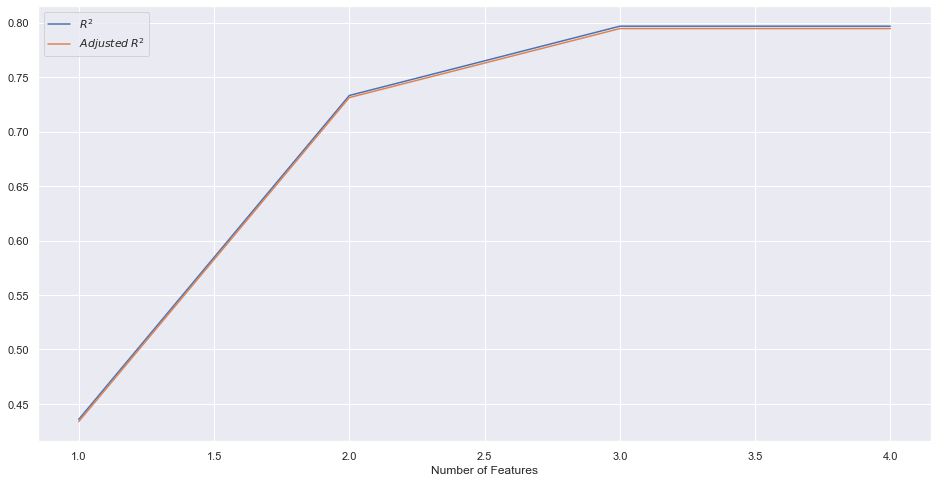

In [227]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (16, 8))
# plot each metric 
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()

### Prediction of Target 

In [228]:
cfl = (list(lr.coef_))
cfl
# newdatepoint = [1024, 1, 3]
# print(newdatepoint)


[38.988694348629565, 15.670531084890062, 102.81921392939567]

In [229]:
x1 = data['PRICEEACH'].mean()
x2 = data['MSRP'].mean()
x3 = data['QUANTITYORDERED'].mean()

print('Mean of PRICEEACH =', round(x1,0))
print('Mean of MSRP =', round(x2,0))
print('Mean of QUANTITYORDERED =', round(x3,0))

Mean of PRICEEACH = 84.0
Mean of MSRP = 101.0
Mean of QUANTITYORDERED = 35.0


In [230]:
b0 = lr.intercept_
cfl = (list(lr.coef_))
print('cfl =', cfl)

cfl = [38.988694348629565, 15.670531084890062, 102.81921392939567]


In [231]:
Ypred = (cfl[0] * x1) + (cfl[1] * x2) + (cfl[2] * x3)  + b0
print('Predict Sales Per Transaction: ', round(Ypred,2))

Predict Sales Per Transaction:  3557.68


In [232]:
mean_sales = data['SALES'].mean()
print('Mean Sales Per Transaction : ', round(mean_sales,2))

Mean Sales Per Transaction :  3553.89


In [233]:
avg_qty_order = data['QUANTITYORDERED'].mean()
print("Average Quantity Per Order: ",round(avg_qty_order,0))

Average Quantity Per Order:  35.0


In [234]:
avg_sales_per_order = Ypred/ avg_qty_order
avg_sales_per_order

101.37908710048896

In [235]:
avg_qty_order_per_year = anm_qty_order['QUANTITYORDERED'].mean()
print("Quantity Per Year: ",round(avg_qty_order_per_year,0))

Quantity Per Year:  33022.0


In [236]:
# Forecast sales 
total_sales = round(avg_qty_order_per_year * avg_sales_per_order,2)
print('Total 2006 Forecast Sales(Linear Regression): ',total_sales)

Total 2006 Forecast Sales(Linear Regression):  3347774.01


In [237]:
# Forecast sales by normal approch (Mean value)
norm_avg_qty_order = data['QUANTITYORDERED'].mean()
norm_avg_sales_per_unit = data['PRICEEACH'].mean() 
norm_total_sales = round(anm_qty_order['QUANTITYORDERED'].mean() *norm_avg_sales_per_unit,2)
print('Total 2006 Forecast Sales (Average Approach): ',norm_total_sales )

Total 2006 Forecast Sales (Average Approach):  2762600.33


In [238]:
diff = norm_total_sales-total_sales
print('Difference of Sales: ',round(diff,2))

Difference of Sales:  -585173.68


In [239]:
diff_per = (abs(diff) / total_sales)
print("Difference in percentage: "+"{:.2%}".format(diff_per ))

Difference in percentage: 17.48%


### Single Featurs Prediction

In [240]:
X_f1 = data['QUANTITYORDERED'].values
X_f1

array([30, 50, 22, ..., 38, 44, 38], dtype=int64)

In [241]:
X_f1 = data['QUANTITYORDERED'].values.reshape(-1,1)
y_f1 = data['SALES']

In [242]:
model_F1 = LinearRegression()
model_F1.fit(X_f1,y_f1)

print(model_F1.coef_, model_F1.intercept_)

[104.26101027] -104.92265488388603


In [243]:
X_train_f1, X_test_f1, y_train_f1, y_test_f1 = train_test_split(X_f1, y_f1, test_size = 0.2)

In [244]:
model_F1.score(X_train_f1, y_train_f1)

0.30353265396029494

In [245]:
model_F1.score(X_test_f1, y_test_f1)

0.30664058896045243

In [246]:
x = [[data['QUANTITYORDERED'].mean()]]
Ypred = model_F1.predict(x)
print('Predicted Sales Per Transaction: ', round(Ypred[0],2))

Predicted Sales Per Transaction:  3553.89


## Ridge Regression

In [247]:
# # Alternative by Model
# optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
# optimal_ridge.fit(X, y)
# print('Alpha:', optimal_ridge.alpha_)
# print('Score:', optimal_ridge.score(X, y))

In [248]:
# view_coeff(X, optimal_ridge)

In [249]:
# # Display results
# plt.figure(figsize = (20, 6))
# plt.subplot(121)
# ax = plt.gca()
# ax.plot(ridge_alphas, coefs)
# ax.set_xscale('log')
# plt.xlabel('alpha')
# plt.ylabel('weights')
# plt.title('Ridge coefficients as a function of the regularisation')
# plt.axis('tight')
# plt.subplot(122)
# ax = plt.gca()
# ax.plot(ridge_alphas, errors)
# ax.set_xscale('log')
# plt.xlabel('alpha')
# plt.ylabel('error')
# plt.title('Coefficient error as a function of the regularisation')
# plt.axis('tight'
# plt.show()

## Customer Segmentation by RFM Analysis

In [250]:
temp= ['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES'] 
RFM_data =data[temp]
RFM_data.shape

(2823, 4)

In [251]:
# RFM Table

NOW = dt.datetime(2005,5,31)

#Convert ORDERDATE to datetime format.
RFM_data['ORDERDATE'] = pd.to_datetime(RFM_data['ORDERDATE'])

# RFM Table
RFM_table=RFM_data.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (NOW - x.max()).days, # Recency
                                                'ORDERNUMBER': lambda x: len(x.unique()), # Frequency
                                                'SALES': lambda x: x.sum()})    # Monetary 

RFM_table['ORDERDATE'] = RFM_table['ORDERDATE'].astype(int)

RFM_table.rename(columns={'ORDERDATE': 'recency', 
                         'ORDERNUMBER': 'frequency',
                         'SALES': 'monetary_value'}, inplace=True)
RFM_table.head()

,recency,frequency,monetary_value
CUSTOMERNAME,,,
"AV Stores, Co.",195,3,"157,807.81"
Alpha Cognac,64,3,"70,488.44"
Amica Models & Co.,264,2,"94,117.26"
"Anna's Decorations, Ltd",83,4,"153,996.13"
Atelier graphique,187,3,"24,179.96"


In [252]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,80.25,2.00,"70,129.43"
0.50,185.00,3.00,"86,522.61"
0.75,229.25,3.00,"120,575.88"


In [253]:
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()
##  RFM Segmentation ----
RFM_Segment = RFM_table.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [254]:
# Identify Best customers
# Using RFMClass = 444 (More than 75% quartile in R,F,M)
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,"912,294.11",4,4,4,444
Mini Gifts Distributors Ltd.,2,17,"654,858.06",4,4,4,444
La Rochelle Gifts,0,4,"180,124.90",4,4,4,444
The Sharp Gifts Warehouse,39,4,"160,010.27",4,4,4,444
Souveniers And Things Co.,2,4,"151,570.98",4,4,4,444


In [255]:
# Identify customers are at the verge of churning?
# using customers who's recency value is low (Less than 25% quartile in R,F,M)

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Land of Toys Inc.,197,4,"164,069.44",2,4,4,244
"AV Stores, Co.",195,3,"157,807.81",2,2,4,224
"Saveley & Henriot, Co.",455,3,"142,874.25",1,2,4,124
Rovelli Gifts,200,3,"137,955.72",2,2,4,224
Online Diecast Creations Co.,208,3,"131,685.30",2,2,4,224


In [256]:
# Identify lost customers
#  Using customers who's recency, frequency as well as monetary values are low (Less than 25% quartile in R,F,M)

RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"Men 'R' US Retailers, Ltd.",508,2,"48,048.46",1,1,1,111
"Double Decker Gift Stores, Ltd",495,2,"36,019.04",1,1,1,111
West Coast Collectables Co.,488,2,"46,084.64",1,1,1,111
Signal Collectibles Ltd.,476,2,"50,218.51",1,1,1,111
Daedalus Designs Imports,465,2,"69,052.41",1,1,1,111


In [257]:
# Identify loyal customers
# Using customers with high frequency value (More than 75% quartile in F)

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,"912,294.11",4,4,4,444
Mini Gifts Distributors Ltd.,2,17,"654,858.06",4,4,4,444
"Australian Collectors, Co.",183,5,"200,995.41",3,4,4,344
Muscle Machine Inc,181,4,"197,736.94",3,4,4,344
La Rochelle Gifts,0,4,"180,124.90",4,4,4,444
